## Getting Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!gdown https://drive.google.com/uc?id=1-6jyPgYLhEPoUNajwSGIbQgXelweuJQa

Downloading...
From: https://drive.google.com/uc?id=1-6jyPgYLhEPoUNajwSGIbQgXelweuJQa
To: /content/train_s3TEQDk.csv
13.8MB [00:00, 22.3MB/s]


In [ ]:
!gdown https://drive.google.com/uc?id=1MEGKPC1D_Y2qq33Vu3qL5h7ucuqrsOPg

Downloading...
From: https://drive.google.com/uc?id=1MEGKPC1D_Y2qq33Vu3qL5h7ucuqrsOPg
To: /content/test_mSzZ8RL.csv
5.70MB [00:00, 26.7MB/s]


In [ ]:
df_train = pd.read_csv('train_s3TEQDk.csv')
df_train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [ ]:
df_test = pd.read_csv('test_mSzZ8RL.csv')
df_test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [ ]:
df_train.drop(['ID'], axis=1, inplace=True)
df_test.drop(['ID'], axis=1, inplace=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               245725 non-null  object
 1   Age                  245725 non-null  int64 
 2   Region_Code          245725 non-null  object
 3   Occupation           245725 non-null  object
 4   Channel_Code         245725 non-null  object
 5   Vintage              245725 non-null  int64 
 6   Credit_Product       216400 non-null  object
 7   Avg_Account_Balance  245725 non-null  int64 
 8   Is_Active            245725 non-null  object
 9   Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.7+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               105312 non-null  object
 1   Age                  105312 non-null  int64 
 2   Region_Code          105312 non-null  object
 3   Occupation           105312 non-null  object
 4   Channel_Code         105312 non-null  object
 5   Vintage              105312 non-null  int64 
 6   Credit_Product       92790 non-null   object
 7   Avg_Account_Balance  105312 non-null  int64 
 8   Is_Active            105312 non-null  object
dtypes: int64(3), object(6)
memory usage: 7.2+ MB


## PyCaret

In [ ]:
from pycaret.classification import *

clf1 = setup(data = df_train, target = 'Is_Lead')

,Description,Value
0,session_id,7112
1,Target,Is_Lead
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(245725, 10)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models(sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8609,0.8744,0.5449,0.8050,0.6498,0.5670,0.5839,1.528
gbc,Gradient Boosting Classifier,0.8603,0.8734,0.5348,0.8115,0.6446,0.5623,0.5813,26.212
ada,Ada Boost Classifier,0.8558,0.8666,0.5060,0.8153,0.6244,0.5411,0.5647,6.251
lda,Linear Discriminant Analysis,0.8509,0.8583,0.4504,0.8498,0.5887,0.5080,0.5462,1.842
rf,Random Forest Classifier,0.8514,0.8543,0.5706,0.7427,0.6453,0.5534,0.5611,29.665
et,Extra Trees Classifier,0.8355,0.8384,0.5695,0.6833,0.6212,0.5172,0.5208,37.361
dt,Decision Tree Classifier,0.7866,0.7091,0.5619,0.5485,0.5551,0.4148,0.4148,1.902
nb,Naive Bayes,0.7566,0.6934,0.0355,0.3625,0.0647,0.0232,0.0453,0.177
knn,K Neighbors Classifier,0.7301,0.5679,0.1388,0.3332,0.1959,0.0658,0.0749,2.943
qda,Quadratic Discriminant Analysis,0.7102,0.5450,0.2275,0.3444,0.2530,0.1051,0.1074,1.010


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1721, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
# create a model
lgbmmod = create_model('lightgbm')

# predict on hold-out
pred_holdout = predict_model(lgbmmod)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8623,0.8733,0.5470,0.8092,0.6528,0.5709,0.5879
1,0.8633,0.8733,0.5453,0.8159,0.6537,0.5727,0.5907
2,0.8600,0.8769,0.5402,0.8037,0.6461,0.5629,0.5802
3,0.8614,0.8723,0.5427,0.8089,0.6496,0.5674,0.5849
4,0.8595,0.8721,0.5265,0.8143,0.6395,0.5572,0.5776
5,0.8592,0.8751,0.5405,0.7998,0.6451,0.5613,0.5781
6,0.8593,0.8691,0.5393,0.8012,0.6446,0.5610,0.5781
7,0.8556,0.8707,0.5205,0.7996,0.6306,0.5458,0.5652
8,0.8622,0.8732,0.5441,0.8117,0.6515,0.5697,0.5874
9,0.8605,0.8762,0.5313,0.8147,0.6432,0.5612,0.5810


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8608,0.875,0.5428,0.8105,0.6502,0.5675,0.5853


In [ ]:
# finalize a model
lgb_final = finalize_model(lgbmmod)

# generate predictions on unseen data
predictions = predict_model(lgb_final, data = df_test)

In [ ]:
predictions

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Label,Score
0,Male,29,RG254,Other,X1,25,Yes,742366,No,0,0.9587
1,Male,43,RG268,Other,X2,49,NaN,925537,No,1,0.8523
2,Male,31,RG270,Salaried,X1,14,No,215949,No,0,0.9335
3,Male,29,RG272,Other,X1,33,No,868070,No,0,0.9761
4,Female,29,RG270,Other,X1,19,No,657087,No,0,0.9761
...,...,...,...,...,...,...,...,...,...,...,...
105307,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes,1,0.9879
105308,Male,55,RG277,Other,X2,86,Yes,1159153,No,1,0.5657
105309,Male,35,RG254,Salaried,X4,15,No,1703727,No,0,0.9237
105310,Male,53,RG254,Other,X3,93,No,737178,Yes,0,0.7790


In [ ]:
predictions['Label'].value_counts()

0    88630
1    16682
Name: Label, dtype: int64

In [ ]:
df_test1 = pd.read_csv('test_mSzZ8RL.csv')

In [ ]:
result = pd.DataFrame({'ID':df_test1['ID'], 'Is_Lead':predictions['Score']})

In [ ]:
result['Is_Lead'].value_counts()

0    88630
1    16682
Name: Is_Lead, dtype: int64

In [ ]:
result.to_csv('Hrisav_AVOutput.csv', index = False, columns=['ID','Is_Lead'])

## ML Algo

## Imputation

In [ ]:
df_train['Credit_Product'].replace(np.nan, 'Yes', inplace=True)
df_test['Credit_Product'].replace(np.nan, 'Yes', inplace=True)

## Feature Transform

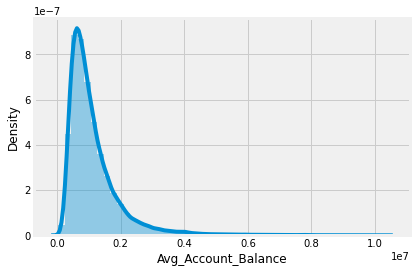

In [ ]:
sns.distplot(df_train['Avg_Account_Balance'])
plt.show()

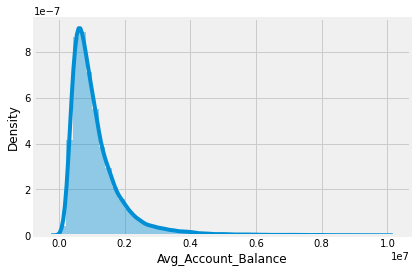

In [ ]:
sns.distplot(df_test['Avg_Account_Balance'])
plt.show()

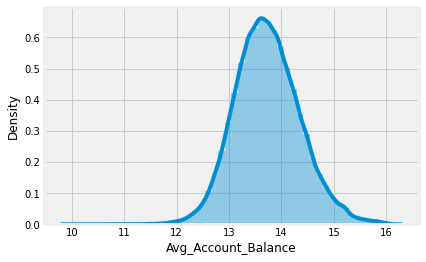

In [ ]:
df_train['Avg_Account_Balance'] = np.log(df_train['Avg_Account_Balance'])
sns.distplot(df_train['Avg_Account_Balance'])
plt.show()

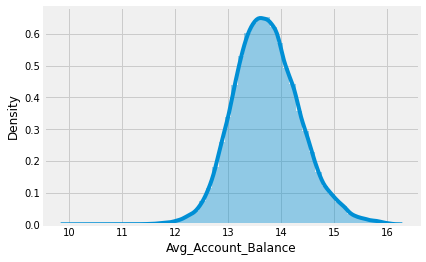

In [ ]:
df_test['Avg_Account_Balance'] = np.log(df_test['Avg_Account_Balance'])
sns.distplot(df_test['Avg_Account_Balance'])
plt.show()

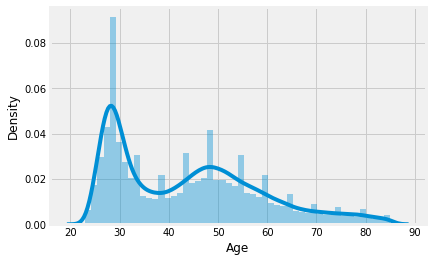

In [ ]:
sns.distplot(df_train['Age'])
plt.show()

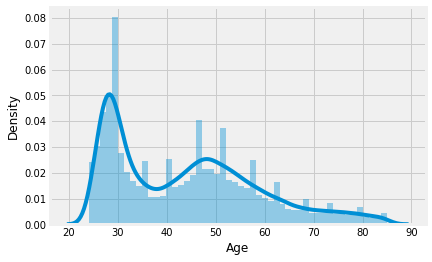

In [ ]:
sns.distplot(df_test['Age'])
plt.show()

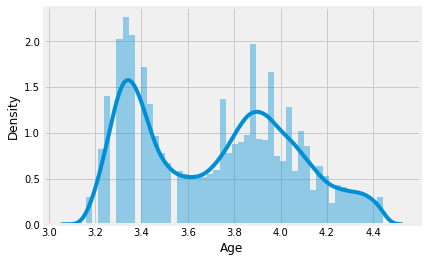

In [ ]:
df_train['Age'] = np.log(df_train['Age'])
sns.distplot(df_train['Age'])
plt.show()

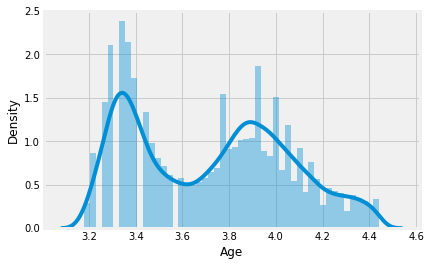

In [ ]:
df_test['Age'] = np.log(df_test['Age'])
sns.distplot(df_test['Age'])
plt.show()

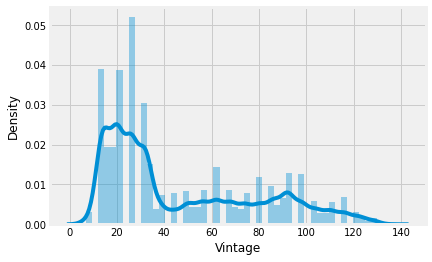

In [ ]:
sns.distplot(df_train['Vintage'])
plt.show()

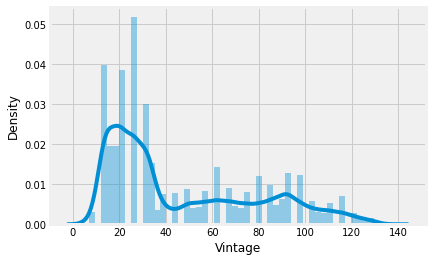

In [ ]:
sns.distplot(df_test['Vintage'])
plt.show()

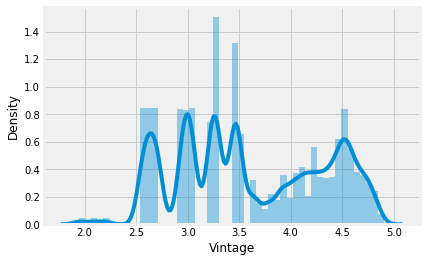

In [ ]:
df_train['Vintage'] = np.log(df_train['Vintage'])
sns.distplot(df_train['Vintage'])
plt.show()

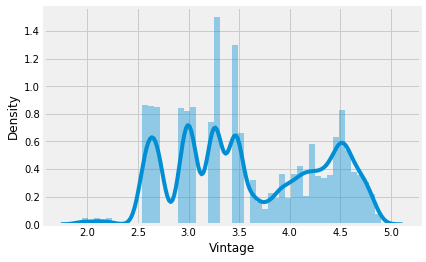

In [ ]:
df_test['Vintage'] = np.log(df_test['Vintage'])
sns.distplot(df_test['Vintage'])
plt.show()

## EDA

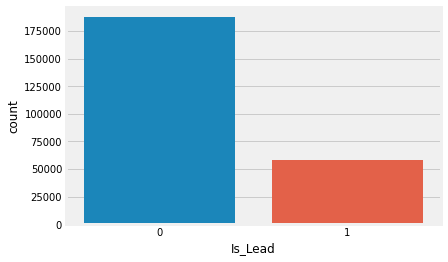

In [ ]:
sns.countplot(df_train['Is_Lead'])

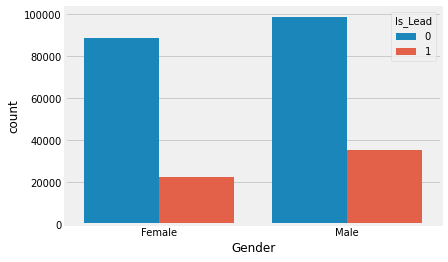

In [ ]:
sns.countplot(x=df_train['Gender'], hue=df_train['Is_Lead'])

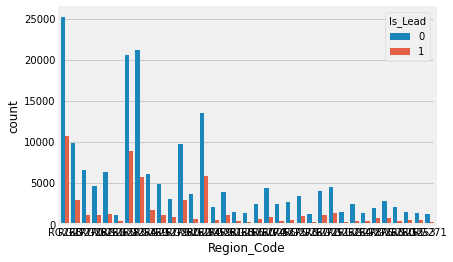

In [ ]:
sns.countplot(x=df_train['Region_Code'], hue=df_train['Is_Lead'])

In [ ]:
df_train['Region_Code'].value_counts()

RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

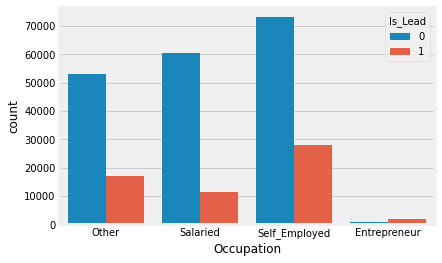

In [ ]:
sns.countplot(x=df_train['Occupation'], hue=df_train['Is_Lead'])

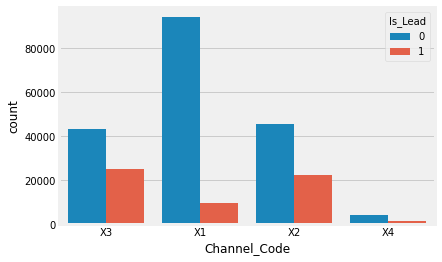

In [ ]:
sns.countplot(x=df_train['Channel_Code'], hue=df_train['Is_Lead'])

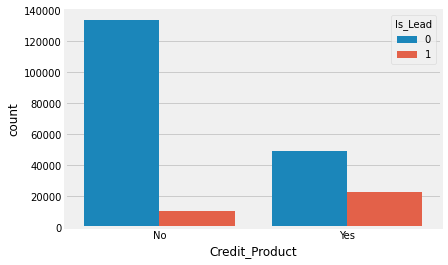

In [ ]:
sns.countplot(x=df_train['Credit_Product'], hue=df_train['Is_Lead'])

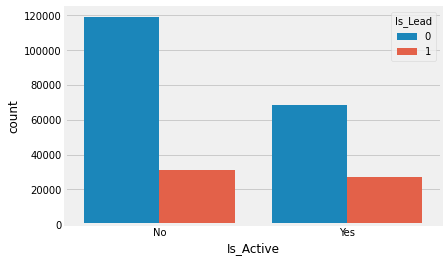

In [ ]:
sns.countplot(x=df_train['Is_Active'], hue=df_train['Is_Lead'])

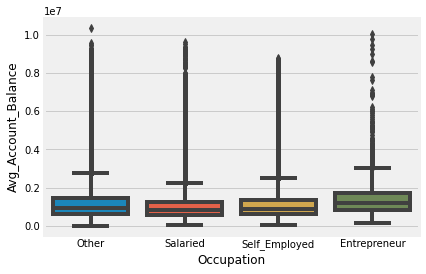

In [ ]:
sns.boxplot(df_train['Occupation'],df_train['Avg_Account_Balance'])

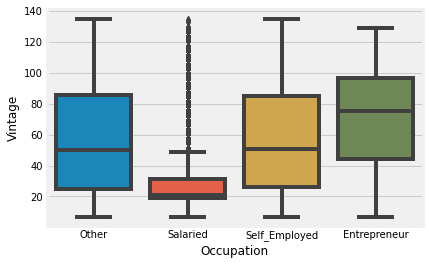

In [ ]:
sns.boxplot(df_train['Occupation'],df_train['Vintage'])

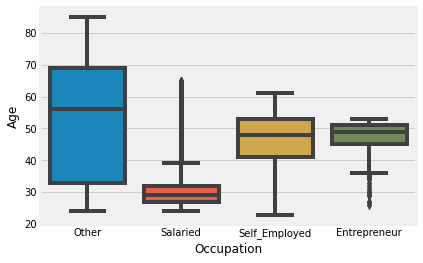

In [ ]:
sns.boxplot(df_train['Occupation'],df_train['Age'])

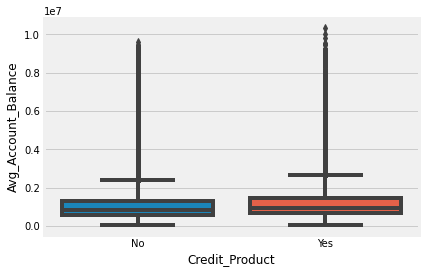

In [ ]:
sns.boxplot(df_train['Credit_Product'],df_train['Avg_Account_Balance'])

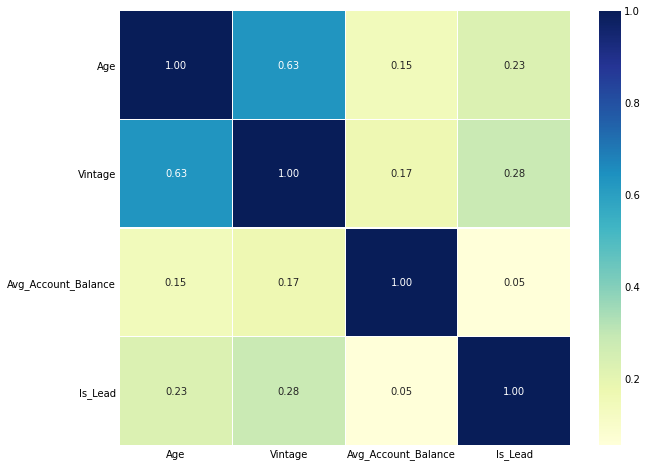

In [ ]:
corrmat = df_train.corr() 

f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot=True, fmt='.2f') 

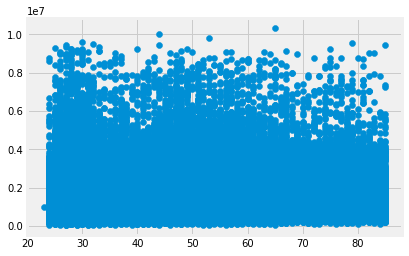

In [ ]:
plt.scatter(df_train['Age'], df_train['Avg_Account_Balance'])

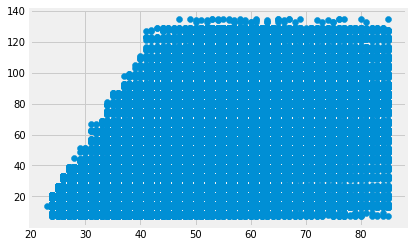

In [ ]:
plt.scatter(df_train['Age'],df_train['Vintage'])

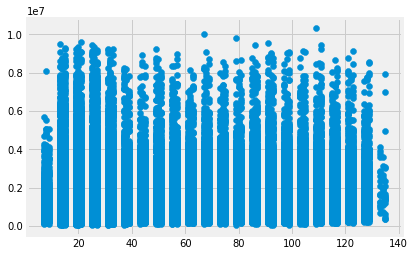

In [ ]:
plt.scatter(df_train['Vintage'],df_train['Avg_Account_Balance'])

## Cross Tabs

In [ ]:
pd.crosstab(df_train['Channel_Code'], df_train['Is_Lead'])

Is_Lead,0,1
Channel_Code,,
X1,94236,9482
X2,45519,22207
X3,43493,25219
X4,4189,1380


In [ ]:
pd.crosstab(df_train['Occupation'], df_train['Is_Lead'])

Is_Lead,0,1
Occupation,,
Entrepreneur,905,1762
Other,52984,17189
Salaried,60503,11496
Self_Employed,73045,27841


In [ ]:
pd.crosstab(df_train['Region_Code'], df_train['Is_Lead'])

Is_Lead,0,1
Region_Code,,
RG250,2103,393
RG251,4569,1381
RG252,3694,592
RG253,1377,481
RG254,21127,5713
RG255,1549,469
RG256,2446,401
RG257,4931,1170
RG258,1521,430


In [ ]:
pd.crosstab(df_train['Credit_Product'], df_train['Is_Lead'])

Is_Lead,0,1
Credit_Product,,
No,133734,10623
Yes,49353,22690


In [ ]:
df_train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,1.456394,RG268,Other,X3,43,No,13.860193,No,0
1,Female,1.224128,RG277,Salaried,X1,32,No,13.274205,No,0
2,Female,1.392612,RG268,Self_Employed,X3,26,No,14.210464,Yes,0
3,Male,1.260266,RG270,Salaried,X1,19,No,13.061453,No,0
4,Female,1.224128,RG282,Salaried,X1,33,No,13.695360,No,0


## Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_train['Gender'] = le.fit_transform(df_train['Gender'])
df_train['Region_Code'] = le.fit_transform(df_train['Region_Code'])
df_train['Occupation'] = le.fit_transform(df_train['Occupation'])
df_train['Channel_Code'] = le.fit_transform(df_train['Channel_Code'])
df_train['Credit_Product'] = le.fit_transform(df_train['Credit_Product'])
df_train['Is_Active'] = le.fit_transform(df_train['Is_Active'])

df_test['Gender'] = le.fit_transform(df_test['Gender'])
df_test['Region_Code'] = le.fit_transform(df_test['Region_Code'])
df_test['Occupation'] = le.fit_transform(df_test['Occupation'])
df_test['Channel_Code'] = le.fit_transform(df_test['Channel_Code'])
df_test['Credit_Product'] = le.fit_transform(df_test['Credit_Product'])
df_test['Is_Active'] = le.fit_transform(df_test['Is_Active'])

In [ ]:
df_train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,4.290459,18,1,2,43,0,13.860193,0,0
1,0,3.401197,27,2,0,32,0,13.274205,0,0
2,0,4.025352,18,3,2,26,0,14.210464,1,0
3,1,3.526361,20,2,0,19,0,13.061453,0,0
4,0,3.401197,32,2,0,33,0,13.695360,0,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Gender               245725 non-null  int64  
 1   Age                  245725 non-null  float64
 2   Region_Code          245725 non-null  int64  
 3   Occupation           245725 non-null  int64  
 4   Channel_Code         245725 non-null  int64  
 5   Vintage              245725 non-null  int64  
 6   Credit_Product       245725 non-null  int64  
 7   Avg_Account_Balance  245725 non-null  float64
 8   Is_Active            245725 non-null  int64  
 9   Is_Lead              245725 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 18.7 MB


In [ ]:
X = df_train.drop('Is_Lead', axis=1)
y = df_train['Is_Lead']

## Light GBM

In [ ]:
params= {'learning_rate': 0.04, 
          'n_estimators': 20000, 
          'max_depth': 20, 
          'max_bin': 80, 
          'reg_alpha': 8, 
          'reg_lambda': 7, 
          'num_leaves': 10,
          'subsample': 0.7}

In [ ]:
# boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
#                importance_type='split', learning_rate=0.1, max_depth=-1,
#                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
#                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
#                random_state=980, reg_alpha=0.0, reg_lambda=0.0, silent=True,
#                subsample=1.0, subsample_for_bin=200000, subsample_freq=0

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier

roc = []

skfold = StratifiedKFold(n_splits=10, random_state=10, shuffle=True)

for fold, (train_data, test_data) in enumerate(skfold.split(X, y)):

    print('Fold: ', fold)

    x_train, y_train = X.iloc[train_data], y.iloc[train_data]
    x_test, y_test = X.iloc[test_data], y.iloc[test_data]

    lgbmodel = LGBMClassifier(**params)
    lgbmodel.fit(x_train, y_train, eval_set=[(x_test, y_test)], early_stopping_rounds=50)

    pred = lgbmodel.predict_proba(x_test)[:, 1]

    roc_score = roc_auc_score(y_test, pred)
    print('ROC AUC score: ', roc_score)
    roc.append(roc_score)

Streaming output truncated to the last 5000 lines.
[370]	valid_0's binary_logloss: 0.384884
[371]	valid_0's binary_logloss: 0.384881
[372]	valid_0's binary_logloss: 0.384872
[373]	valid_0's binary_logloss: 0.384869
[374]	valid_0's binary_logloss: 0.38487
[375]	valid_0's binary_logloss: 0.384865
[376]	valid_0's binary_logloss: 0.384857
[377]	valid_0's binary_logloss: 0.384848
[378]	valid_0's binary_logloss: 0.384849
[379]	valid_0's binary_logloss: 0.38485
[380]	valid_0's binary_logloss: 0.384852
[381]	valid_0's binary_logloss: 0.384855
[382]	valid_0's binary_logloss: 0.384852
[383]	valid_0's binary_logloss: 0.384851
[384]	valid_0's binary_logloss: 0.384847
[385]	valid_0's binary_logloss: 0.384846
[386]	valid_0's binary_logloss: 0.384849
[387]	valid_0's binary_logloss: 0.384846
[388]	valid_0's binary_logloss: 0.384838
[389]	valid_0's binary_logloss: 0.384838
[390]	valid_0's binary_logloss: 0.384837
[391]	valid_0's binary_logloss: 0.384838
[392]	valid_0's binary_logloss: 0.384841
[393]	va

In [ ]:
roc

[0.8505943220524455,
 0.8499544924427855,
 0.8469035704738263,
 0.8508788163616259,
 0.8550140219399858,
 0.8526898225368517,
 0.8536431223308321,
 0.8528037646435296,
 0.8488262106101357,
 0.8493850422176713]

In [ ]:
lgbmodel.predict_proba(df_test)

array([[0.93421836, 0.06578164],
       [0.64029497, 0.35970503],
       [0.93780927, 0.06219073],
       ...,
       [0.93031995, 0.06968005],
       [0.7693674 , 0.2306326 ],
       [0.94709077, 0.05290923]])

In [ ]:
lgbmodel.predict_proba(df_test)[:,1]

array([0.06578164, 0.35970503, 0.06219073, ..., 0.06968005, 0.2306326 ,
       0.05290923])

In [ ]:
preds = lgbmodel.predict_proba(df_test)[:,1]

In [ ]:
df_test1 = pd.read_csv('test_mSzZ8RL.csv')

In [ ]:
result = pd.DataFrame({'ID':df_test1['ID'], 'Is_Lead':preds})

In [ ]:
result.to_csv('hrisav_preds_final.csv', index = False, columns=['ID','Is_Lead'])

## Things which didn't work out (gave bad AUC score), so left out

KNN Imputation

Imputation through Model Building

One Hot Encoding

Scaling

Feature Interaction

SMOTE

Also, Light GBM gave the best result, so removed all other models.